In [1]:
# Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Read in the data

anime_df = pd.read_csv("/content/drive/MyDrive/anime.csv")
rating_df = pd.read_csv("/content/drive/MyDrive/rating.csv")

In [4]:
rating_df.shape

(7813737, 3)

In [5]:
anime_df.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [6]:
anime_df.rename(columns = {'rating':'mean_rating'}, inplace = True)

In [7]:
anime_df.head()

,anime_id,name,genre,type,episodes,mean_rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [8]:
anime_df[anime_df['anime_id'] == 20]

,anime_id,name,genre,type,episodes,mean_rating,members
841,20,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,7.81,683297


In [9]:
rating_df.head()

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1


In [10]:
# Find count of unique users and anime

print("Total number of unique users   :", len(np.unique(rating_df.user_id)))
print("Total number of unique anime  :", len(np.unique(anime_df.anime_id)))

Total number of unique users   : 73515
Total number of unique anime  : 12294


In [11]:
# Find the range of ratings

np.unique(rating_df.rating)

array([-1,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [12]:
# Check for any null/NaN values

rating_df.isna().sum() 

user_id     0
anime_id    0
rating      0
dtype: int64

In [13]:
anime_df.isna().sum() 

anime_id         0
name             0
genre           62
type            25
episodes         0
mean_rating    230
members          0
dtype: int64

In [14]:
# Changing NaN values of ratings to 0.0

anime_df.loc[anime_df['mean_rating'].isna(), 'mean_rating'] = 0.0
anime_df['mean_rating'].isnull().any()

False

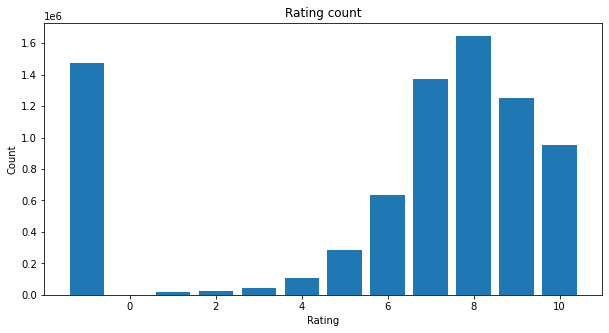

In [15]:
# Note: -1 rating if the user watched it but didn't assign a rating

counts = rating_df['rating'].value_counts()
plt.figure(figsize=(10,5))
plt.bar(counts.index, counts.values)
plt.title('Rating count')
plt.ylabel('Count')
plt.xlabel('Rating')
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


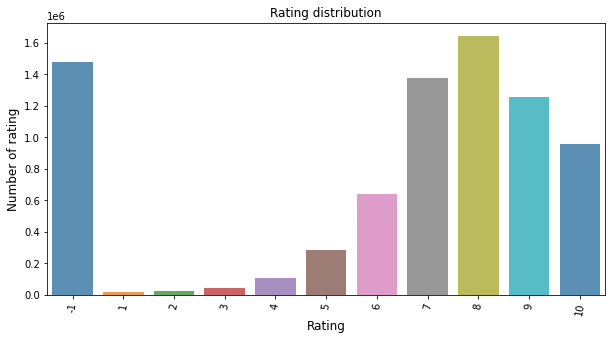

In [16]:
cnt_pro = rating_df['rating'].value_counts()
plt.figure(figsize=(10,5))
sns.barplot(cnt_pro.index, cnt_pro.values, alpha=0.8, palette= "tab10")
#sns.color_palette("tab10")
plt.ylabel('Number of rating', fontsize=12)
plt.xlabel('Rating', fontsize=12)
plt.title("Rating distribution")
plt.xticks(rotation=80)
plt.show();

In [17]:
# Merging the 2 datasets

df_merged = pd.merge(rating_df,anime_df,on='anime_id')

In [18]:
df_merged.head()

,user_id,anime_id,rating,name,genre,type,episodes,mean_rating,members
0,1,20,-1,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,7.81,683297
1,3,20,8,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,7.81,683297
2,5,20,6,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,7.81,683297
3,6,20,-1,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,7.81,683297
4,10,20,-1,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,7.81,683297


In [19]:
# Finding 10 most rated animes
most_rated = df_merged.groupby('name')['rating'].count().sort_values(ascending=False).head(10)

In [20]:
most_rated = most_rated.to_frame().reset_index()

In [21]:
# Finding 10 least rated animes
least_rated = df_merged.groupby('name')['rating'].count().sort_values(ascending=True).head(10)
least_rated = least_rated.to_frame().reset_index()

In [22]:
least_rated

,name,rating
0,Geunyeoneun Yeppeotda,1
1,Hoshi Uranai Kirakira,1
2,Legend of the Moles: The Treasure of Scylla,1
3,Legend of the Moles: The Frozen Horror,1
4,Storywriter,1
5,Captain (TV),1
6,Captain,1
7,Otokogi,1
8,Otoko wa Tsurai yo: Torajirou Wasurenagusa,1
9,Straw Byururu,1


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


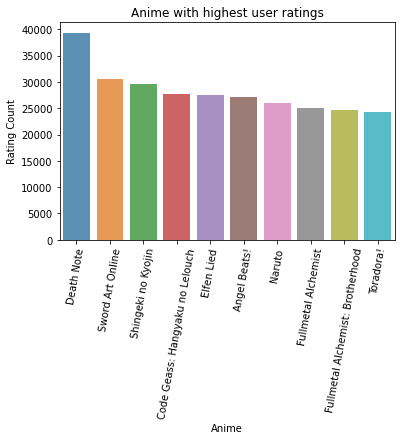

In [23]:

plt.figure(figsize=(6,4))
sns.barplot(most_rated['name'], most_rated['rating'], alpha=0.8)
#sns.color_palette("tab10")
plt.title('Anime with highest user ratings')
plt.ylabel('Rating Count')
plt.xlabel('Anime')
plt.xticks(rotation=80)
plt.show()

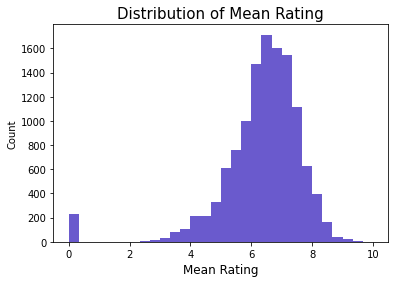

In [24]:
# Distribution of mean rating out of 10

plt.figure(figsize=(6,4))
plt.hist(x='mean_rating',data=anime_df,bins=30, color='slateblue')
plt.title('Distribution of Mean Rating', fontsize=15)
plt.xlabel('Mean Rating', fontsize=12)
plt.ylabel("Count")
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


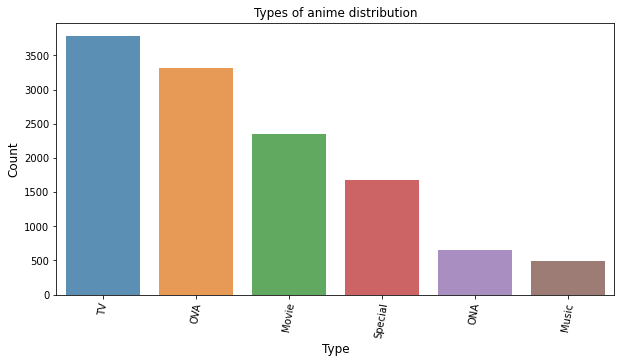

In [25]:
# Original Net Animation (ONA) is an anime that is directly released onto the Internet
# Original Video Animation (OVA) is an animated film or series made specially for release in home-video formats.
type_count = anime_df['type'].value_counts()

plt.figure(figsize=(10,5))
sns.barplot(type_count.index, type_count.values, alpha=0.8, palette= "tab10")
plt.ylabel('Count', fontsize=12)
plt.xlabel('Type', fontsize=12)
plt.title("Types of anime distribution")
plt.xticks(rotation=80)
plt.show();